# Application and optimization of ARMA model in stock price prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.plotting import lag_plot
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf

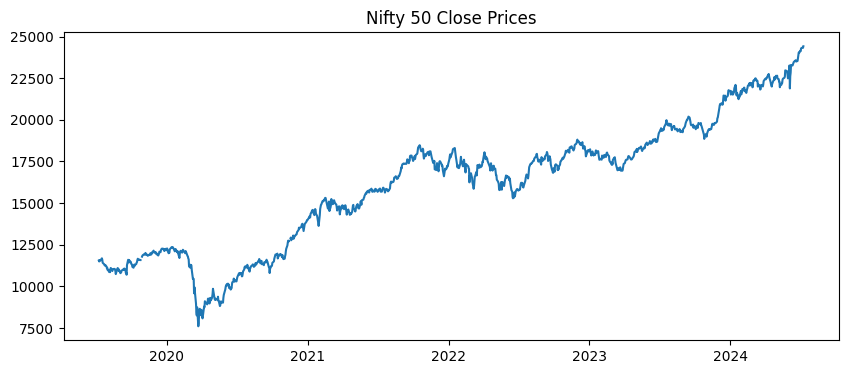

MissingDataError: exog contains inf or nans

In [3]:
data=pd.read_csv("/home/shubham/Desktop/NIFTY-Share-Market-Price-Prediction/data/NIFTY 50.csv")
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Select the 'Close' price for the AR model
close_prices = data['Close']
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(close_prices)
plt.title('Nifty 50 Close Prices')
plt.show()

# Perform the Augmented Dickey-Fuller test
result = adfuller(close_prices)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the series is not stationary, difference the data
if result[1] > 0.05:
    close_prices_diff = close_prices.diff().dropna()
else:
    close_prices_diff = close_prices



## Data Preparation

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

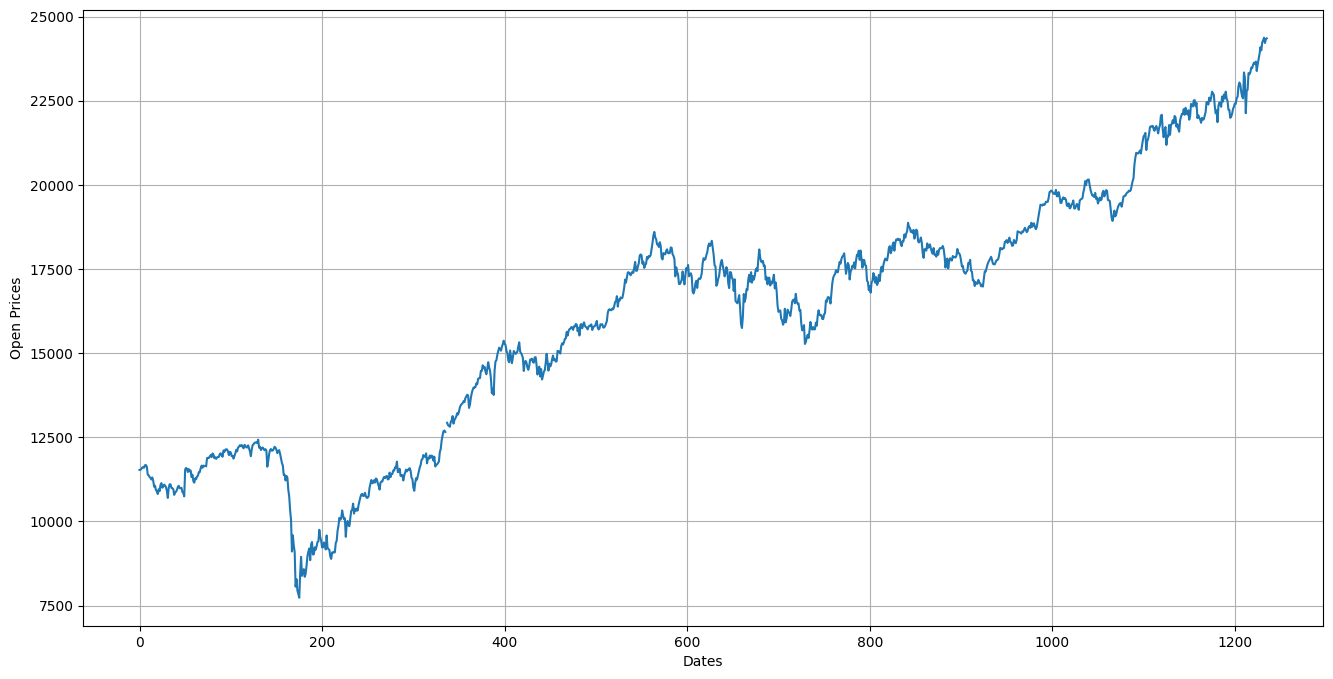

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('/home/shubham/Desktop/NIFTY-Share-Market-Price-Prediction/data/NIFTY 50.csv')
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'])
data.columns

<Axes: title={'center': 'NIFTY 50 Closing Prices'}, xlabel='Date'>

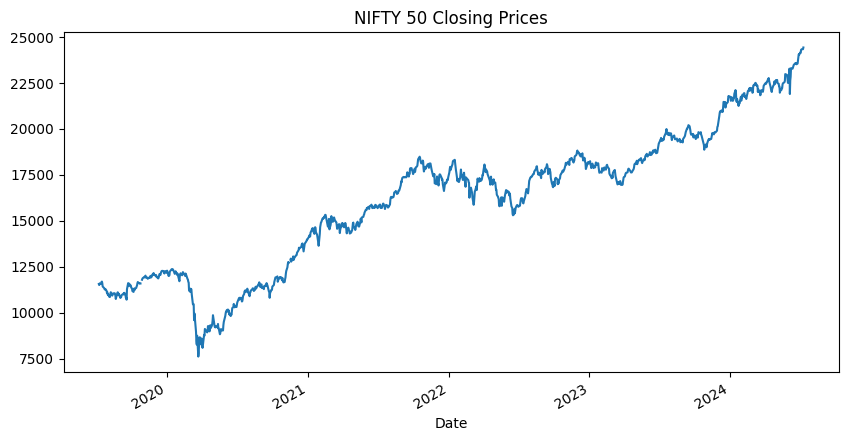

In [5]:
# Ensure the columns are correctly referenced
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Plotting the closing price
data['Close'].plot(figsize=(10, 5), title='NIFTY 50 Closing Prices')


/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                 1231
Model:                 ARIMA(0, 0, 1)   Log Likelihood                3675.963
Date:                Tue, 23 Jul 2024   AIC                          -7345.926
Time:                        19:35:40   BIC                          -7330.580
Sample:                             0   HQIC                         -7340.153
                               - 1231                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.683      0.092   -9.57e-05       0.001
ma.L1         -0.0727      0.016     -4.618      0.000      -0.104      -0.042
sigma2         0.0001   2.31e-06     64.584      0.0

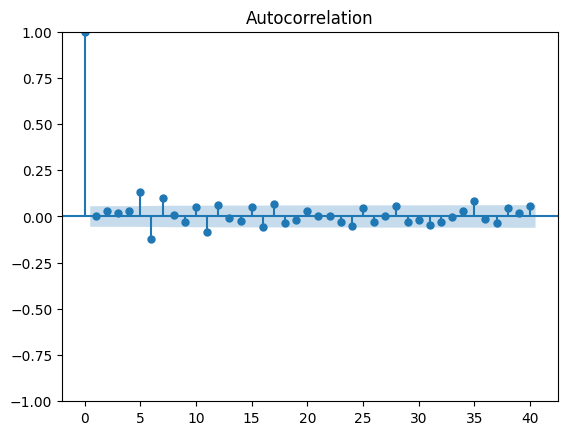

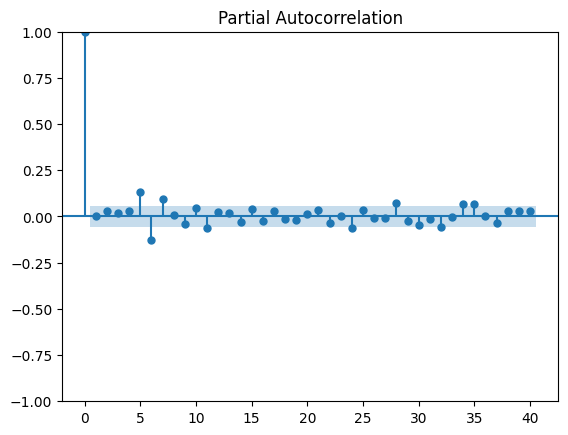

/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


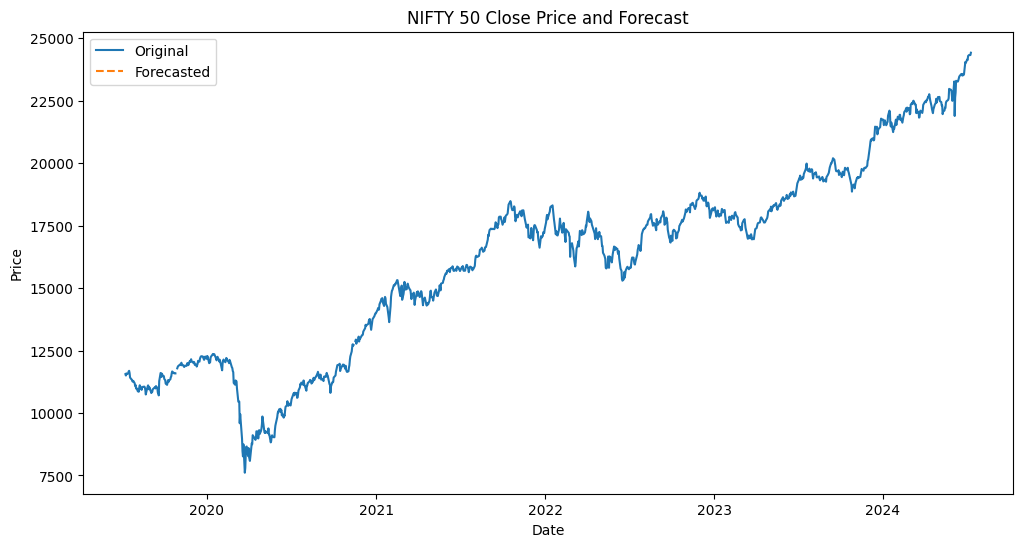

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = '/home/shubham/Desktop/NIFTY-Share-Market-Price-Prediction/data/NIFTY 50.csv'
nifty_data = pd.read_csv(file_path)

# Convert Date to datetime and set as index
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data.set_index('Date', inplace=True)

# Calculate log returns
nifty_data['Log_Return'] = np.log(nifty_data['Close'] / nifty_data['Close'].shift(1))

# Fit ARIMA model
arima_model = ARIMA(nifty_data['Log_Return'].dropna(), order=(0, 0, 1))
arima_result = arima_model.fit()
print(arima_result.summary())

# Check residuals
sm.graphics.tsa.plot_acf(arima_result.resid, lags=40)
sm.graphics.tsa.plot_pacf(arima_result.resid, lags=40)
plt.show()

# Forecast using ARIMA model
arima_forecast = arima_result.forecast(steps=30)
arima_forecast = pd.Series(arima_forecast, index=pd.date_range(start=nifty_data.index[-1], periods=30, freq='B'))

# Convert log returns back to price levels (if required)
last_close_price = nifty_data['Close'].iloc[-1]
forecasted_prices = last_close_price * np.exp(arima_forecast.cumsum())

# Plot the original and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(nifty_data['Close'], label='Original')
plt.plot(forecasted_prices, label='Forecasted', linestyle='--')
plt.title('NIFTY 50 Close Price and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                 1231
Model:                 ARIMA(0, 0, 1)   Log Likelihood                3675.963
Date:                Thu, 18 Jul 2024   AIC                          -7345.926
Time:                        15:14:48   BIC                          -7330.580
Sample:                             0   HQIC                         -7340.153
                               - 1231                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.683      0.092   -9.57e-05       0.001
ma.L1         -0.0727      0.016     -4.618      0.000      -0.104      -0.042
sigma2         0.0001   2.31e-06     64.584      0.0

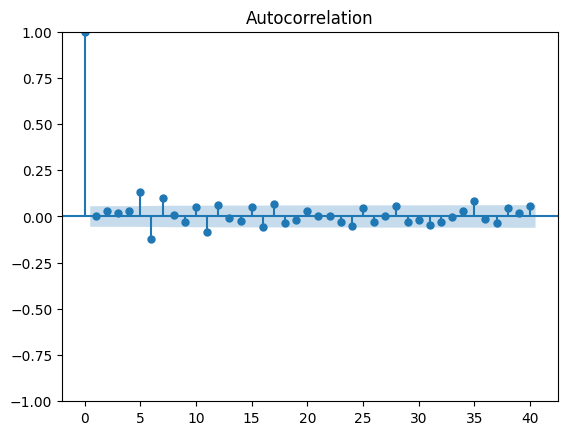

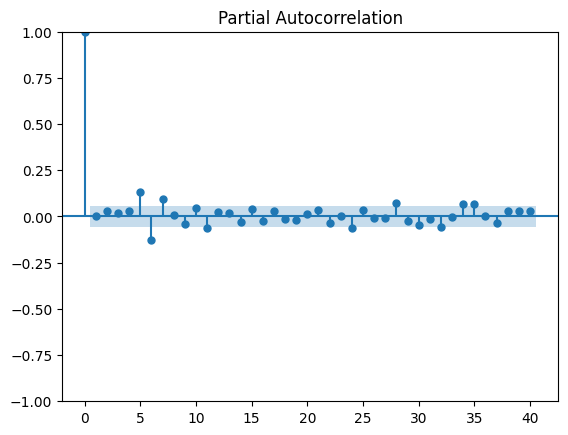

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6991652919.990003
Iteration:      2,   Func. Count:     19,   Neg. LLF: 662168004573.222
Iteration:      3,   Func. Count:     33,   Neg. LLF: -3970.991533050439
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3970.991539085505
            Iterations: 7
            Function evaluations: 33
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3970.99
Distribution:                  Normal   AIC:                          -7933.98
Method:            Maximum Likelihood   BIC:                          -7913.52
                                        No. Observations:                 1231
Date:                Th

/home/shubham/.local/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001492. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


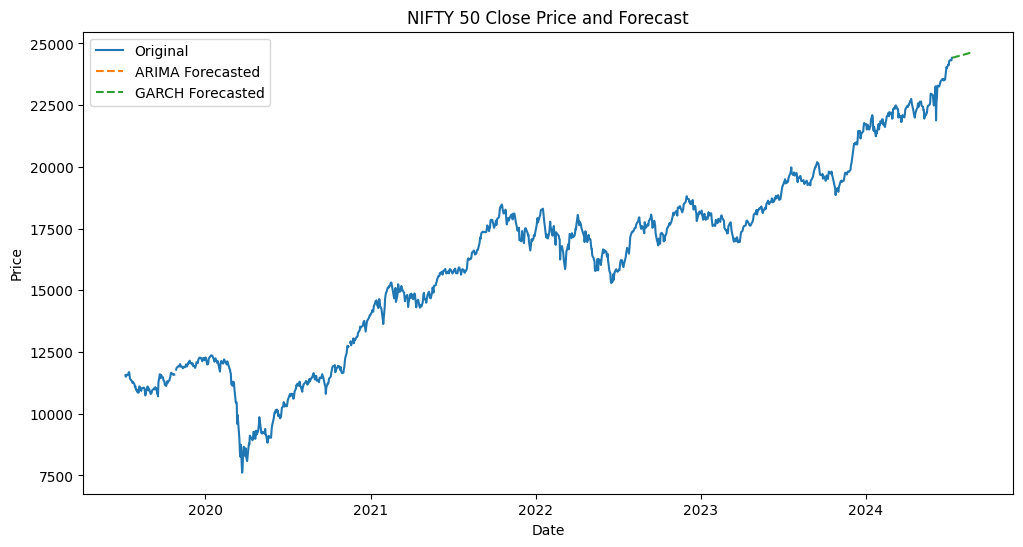

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Load the dataset
file_path = '/home/shubham/Desktop/NIFTY-Share-Market-Price-Prediction/data/NIFTY 50.csv'
nifty_data = pd.read_csv(file_path)

# Convert Date to datetime and set as index
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data.set_index('Date', inplace=True)

# Calculate log returns
nifty_data['Log_Return'] = np.log(nifty_data['Close'] / nifty_data['Close'].shift(1))

# Fit ARIMA model
arima_model = ARIMA(nifty_data['Log_Return'].dropna(), order=(0, 0, 1))
arima_result = arima_model.fit()
print(arima_result.summary())

# Check residuals
sm.graphics.tsa.plot_acf(arima_result.resid, lags=40)
sm.graphics.tsa.plot_pacf(arima_result.resid, lags=40)
plt.show()

# Fit GARCH model to the residuals of the ARIMA model
garch_model = arch_model(arima_result.resid, vol='Garch', p=1, q=1)
garch_result = garch_model.fit()
print(garch_result.summary())

# Forecast using ARIMA model
arima_forecast = arima_result.get_forecast(steps=30).predicted_mean
arima_forecast = pd.Series(arima_forecast, index=pd.date_range(start=nifty_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='B'))

# Forecast using GARCH model
garch_forecast = garch_result.forecast(horizon=30)
garch_forecast_mean = garch_forecast.mean.iloc[-30:]  # Get the forecasted mean for the next 30 days
garch_forecast_mean = pd.Series(garch_forecast_mean.values.flatten(), index=pd.date_range(start=nifty_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='B'))

# Convert log returns back to price levels
last_close_price = nifty_data['Close'].iloc[-1]

# ARIMA forecasted prices
forecasted_prices_arima = last_close_price * np.exp(arima_forecast.cumsum())

# GARCH forecasted prices
forecasted_prices_garch = last_close_price * np.exp(garch_forecast_mean.cumsum())

# Plot the original and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(nifty_data['Close'], label='Original')
plt.plot(forecasted_prices_arima, label='ARIMA Forecasted', linestyle='--')
plt.plot(forecasted_prices_garch, label='GARCH Forecasted', linestyle='--')
plt.title('NIFTY 50 Close Price and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Autocorrelation process assumes that observation of previous several time steps are useful to predict the next step which is the correlation between the observations themselves.
## Calculate the correlation between output variables and several lagged values. AR process will get the lagged value with high correlation a greater weight in model.
## If there were low or none correlation between output variable and all the lagged values, this time-series might be unpredictable.  
## Hence before go on AR process, figuring out autocorrelation of the one-factor time series itself is necessary to do.

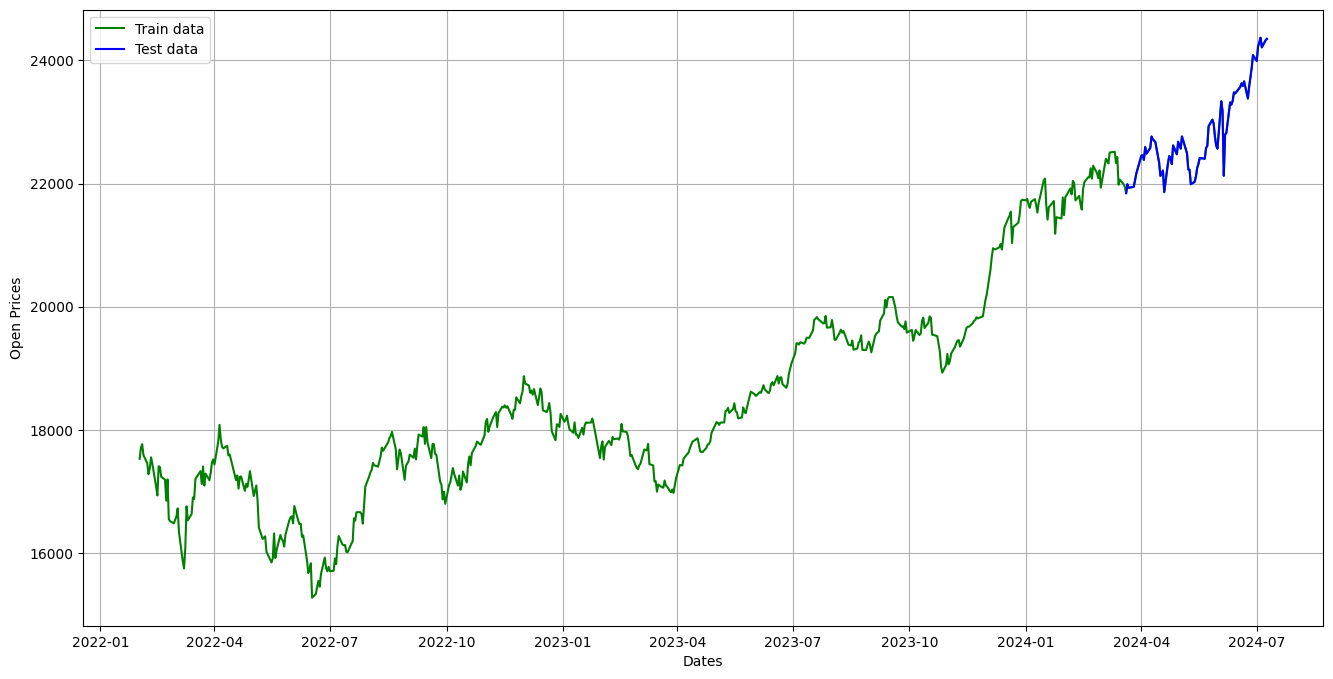

In [7]:
train_data, test_data = data[0:-73], data[-73:]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'].tail(600), 'green', label='Train data')
plt.plot(test_data['Open'], 'blue', label='Test data')
plt.legend()

### The charts above shows a high correlation between y(t) and y(t+5).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


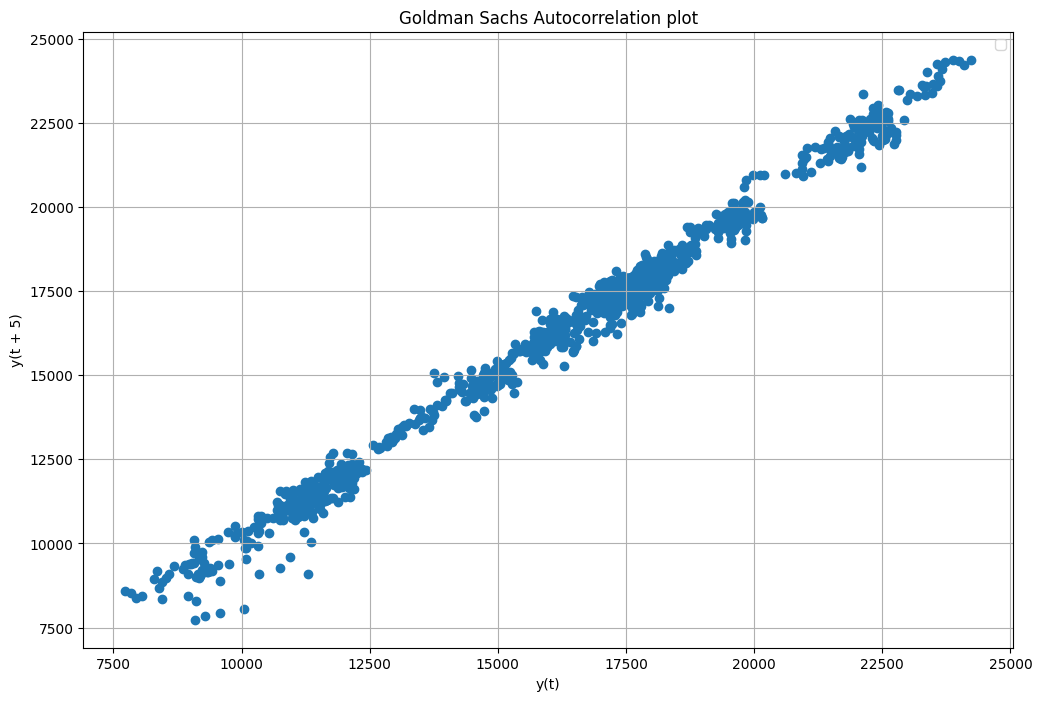

In [8]:
plt.figure(figsize=(12,8))
lag_plot(data['Open'], lag=5)
plt.title('Goldman Sachs Autocorrelation plot')
plt.grid(True)
plt.legend()

### Checking correlation by calculating covariance:

In [9]:
values = DataFrame(data['Open'].values)
dataframe = concat([values.shift(1),values.shift(5),values.shift(10),values.shift(30), values], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result = dataframe.corr()
print(result)

             t       t+1       t+5      t+10      t+30
t     1.000000  0.996278  0.991095  0.968576  0.998956
t+1   0.996278  1.000000  0.995162  0.973091  0.995242
t+5   0.991095  0.995162  1.000000  0.978885  0.990031
t+10  0.968576  0.973091  0.978885  1.000000  0.967477
t+30  0.998956  0.995242  0.990031  0.967477  1.000000


# AR

In [10]:
train_ar = train_data['Open']
test_ar = test_data['Open']

model = AR(train_ar)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
window = 1
history = train_ar[len(train_ar)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_ar)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test_ar[t]
    predictions.append(yhat+22)
    history.append(obs)
plt.figure(figsize=(14,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Close price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()
plt.figure(figsize=(14,8))
print('Lag: %s' % model_fit.k_ar)
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label='Close price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()
print('MSE: '+str(mean_squared_error(test_data['Open'], predictions)))
print('MAE: '+str(mean_absolute_error(test_data['Open'], predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['Open'], predictions))))

NotImplementedError: AR has been removed from statsmodels and replaced with statsmodels.tsa.ar_model.AutoReg.

# MA

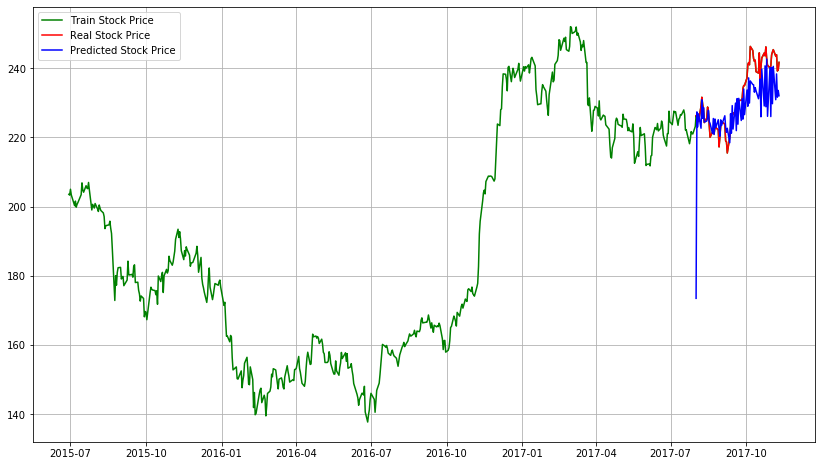

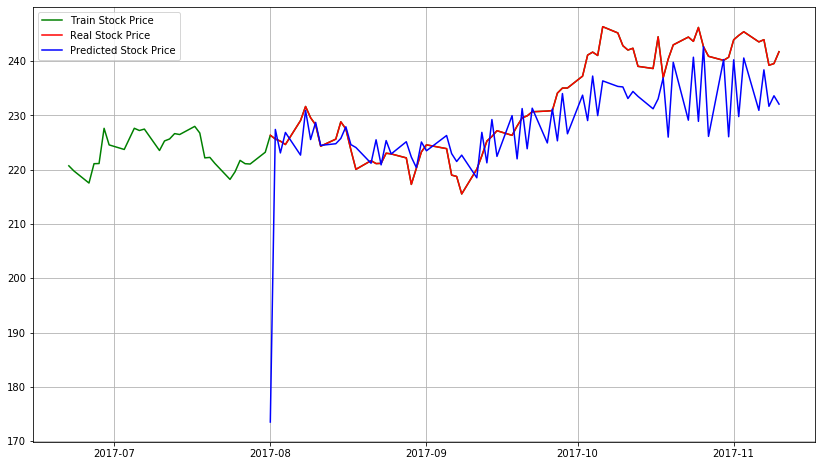

MSE: 83.67215858447196
MAE: 5.780447016729906
RMSE: 9.147248689331233


In [ ]:
train_ma = train_data['Open']
test_ma = test_data['Open']
history = [x for x in train_ma]
y = test_ma
predictions = list()
model = ARMA(history, order=(0,1))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
for i in range(1, len(y)):
    model = ARMA(history, order=(0,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat+50)
    obs = y[i]
    history.append(obs)
plt.figure(figsize=(14,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

# ARMA

## Two approaches for stationary.
### 1. Difference.


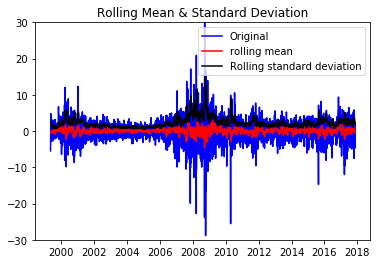

Results of Dickey-Fuller Test:
Test Statistic                -1.392256e+01
p-value                        5.263162e-26
#Lags Used                     1.900000e+01
Number of Observations Used    4.640000e+03
Critical value (1%)           -3.431760e+00
Critical value (5%)           -2.862163e+00
Critical value (10%)          -2.567102e+00
dtype: float64


In [ ]:
def test_stationarity(timeseries):
    rolmean = pd.Series.rolling(timeseries,window=12).mean()
    rolstd = pd.Series.rolling(timeseries, window=12).std()
    fig = plt.figure()
    fig.add_subplot()
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean , color = 'red',label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label= 'Rolling standard deviation')
    plt.ylim([-30,30])
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)
ts_log = data['Open']
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Both mean and variance amplitudes of the data reduced against time axis after difference. Dickey Fuller test showed the data is stationary in 90% confidence level.

### Figuring out p and q in ARMA ( p, q) by Autocorrelation Function and Partial Autocorrelation function.

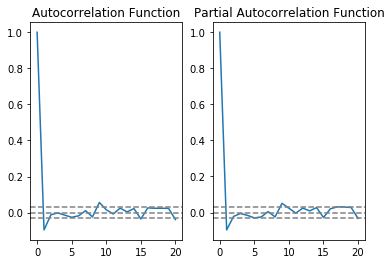

In [ ]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

### ARMA process with data after difference:

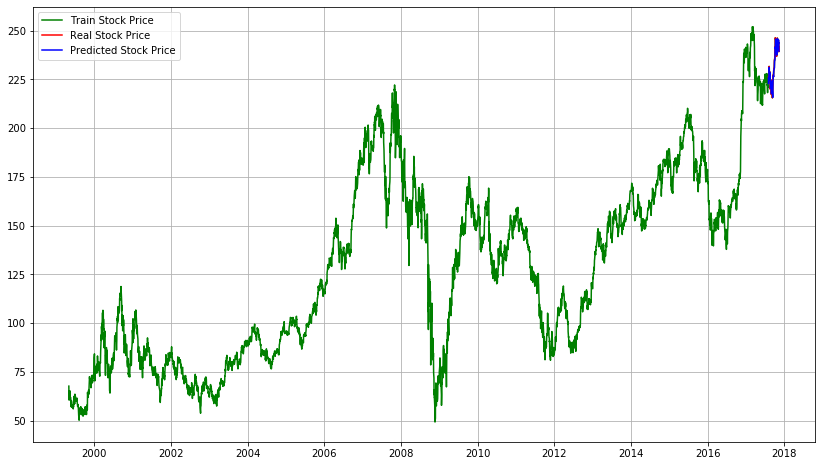

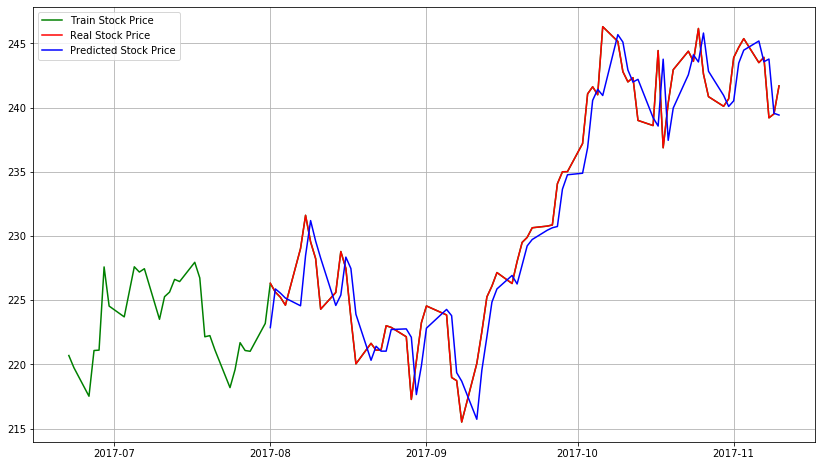

MSE: 6.7060167609099075
MAE: 2.031020223465372
RMSE: 2.589597799062609


In [ ]:
train_arma = train_data['Open']
test_arma = test_data['Open']
history = [x for x in train_arma]
y = test_arma
predictions = list()
model = ARMA(history, order=(1,1))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
for i in range(1, len(y)):
    model = ARMA(history, order=(1,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = y[i]
    history.append(obs)
plt.figure(figsize=(14,8))
plt.plot(data.index, data['Open'], color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

## 2.Seasonal decomposition

<Figure size 1332x756 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

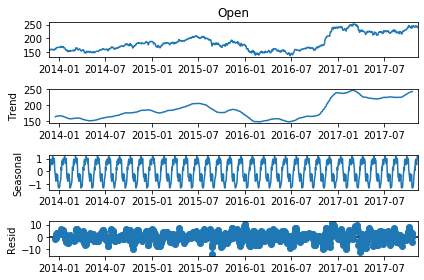

In [ ]:
data_arima = data['Open']
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
decomposition = seasonal_decompose(data_arima[-1000:], model='additive', freq=30)
plt.figure(figsize=(20,10))
fig = decomposition.plot()
plt.show()

### Separate original data into three parts as shown in illustration. Residual is the rest of data which can be used in the model. It is stationary data after eliminating the other two parts.


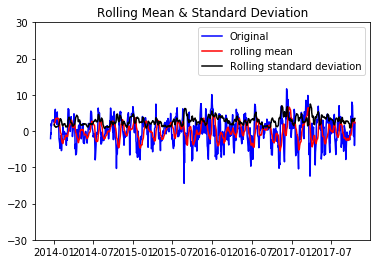

Results of Dickey-Fuller Test:
Test Statistic                -1.105648e+01
p-value                        4.930309e-20
#Lags Used                     7.000000e+00
Number of Observations Used    9.620000e+02
Critical value (1%)           -3.437166e+00
Critical value (5%)           -2.864549e+00
Critical value (10%)          -2.568372e+00
dtype: float64


In [ ]:
def test_stationarity(timeseries):
    rolmean = pd.Series.rolling(timeseries,window=12).mean()
    rolstd = pd.Series.rolling(timeseries, window=12).std()
    fig = plt.figure()
    fig.add_subplot()
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean , color = 'red',label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label= 'Rolling standard deviation')
    plt.ylim([-30,30])
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)
residual = decomposition.resid
residual.dropna(inplace=True)
test_stationarity(residual)

### As shown in the charts, mean and variance have low volatility. And Dickey Fuller test showed the data is stationary in 99% confidence level.

### ARMA process with data with seasonal decomposition

In [ ]:
trend = decomposition.trend
sea=decomposition.seasonal

In [ ]:
train_trend, test_trend = trend[0:-73], trend[-73:]
train_sea, test_sea = sea[0:-73], sea[-73:]

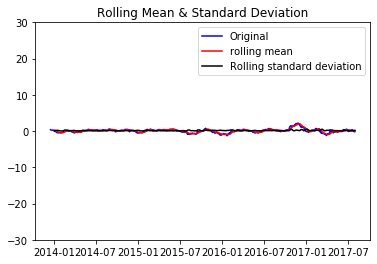

Results of Dickey-Fuller Test:
Test Statistic                  -5.159594
p-value                          0.000011
#Lags Used                      21.000000
Number of Observations Used    889.000000
Critical value (1%)             -3.437727
Critical value (5%)             -2.864797
Critical value (10%)            -2.568504
dtype: float64


In [ ]:
def test_stationarity(timeseries):
    rolmean = pd.Series.rolling(timeseries,window=12).mean()
    rolstd = pd.Series.rolling(timeseries, window=12).std()
    fig = plt.figure()
    fig.add_subplot()
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean , color = 'red',label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label= 'Rolling standard deviation')
    plt.ylim([-30,30])
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)
ts_log = train_trend
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

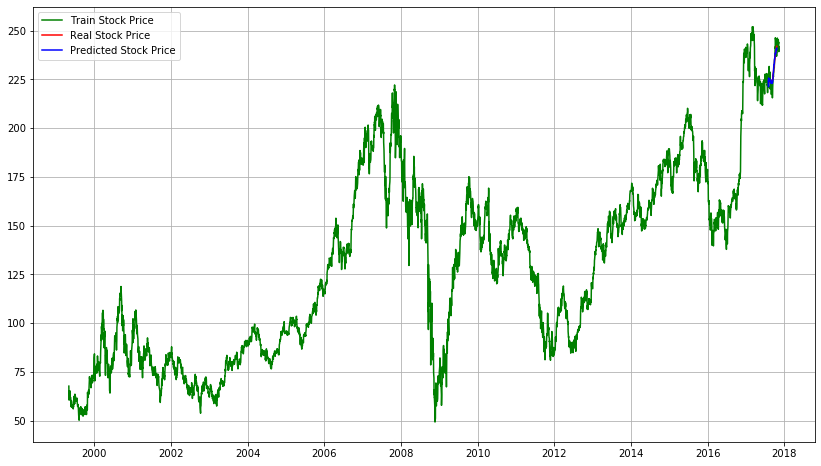

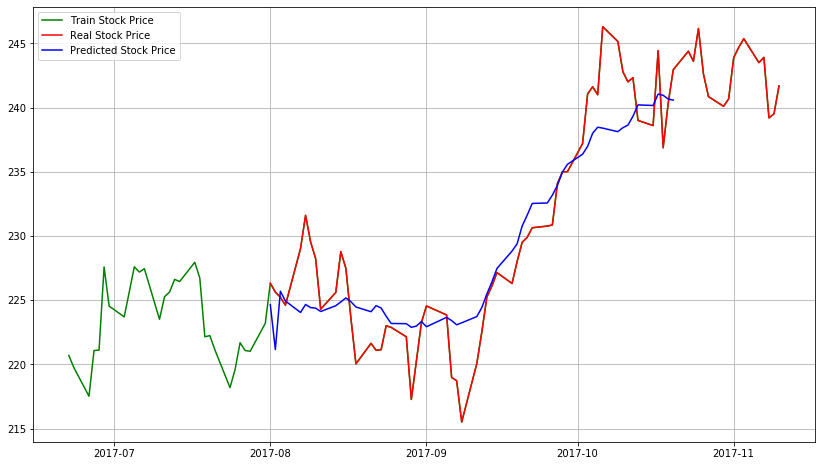

MSE: 0.8506116053086017
MAE: 0.781009121684144
RMSE: 0.9222860756341287


In [ ]:
train_arima = train_trend.dropna()
test_arima = test_trend.dropna()
history = [x for x in train_arima]
y = test_arima
predictions = list()
model = ARIMA(history, order=(2,1,2))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0]+test_sea[0])
for i in range(1, len(y)):
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat+test_sea[i])
    obs = y[i]
    history.append(obs)
plt.figure(figsize=(14,8))
plt.plot(data.index, data['Open'], color='green', label = 'Train Stock Price')
plt.plot(y.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(y.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Stock Price')
plt.plot(data.index[-73:], data['Open'].tail(73), color = 'red', label = 'Real Stock Price')
plt.plot(y.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

# ARMA-GARCH

In [ ]:
returns = pd.DataFrame(np.log(train_data['Open']).diff().dropna())
returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller
returns_array_like = [x for l in returns.values for x in l]
_, pvalue, *_ = adfuller(returns_array_like)
print ('pvalue :',pvalue)

pvalue : 2.635655516449734e-19


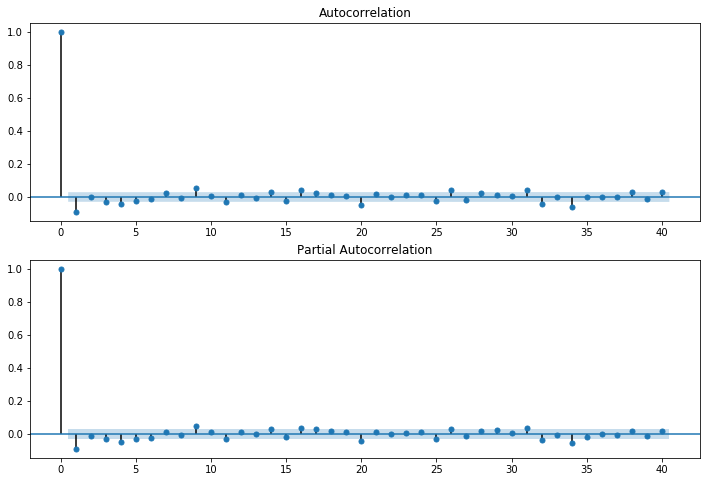

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(returns.values, lags=40, alpha=0.05, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(returns.values, lags=40, alpha=0.05, ax=ax2)

In [ ]:
import  statsmodels.tsa.stattools as sts
resid = sts.arma_order_select_ic(returns, max_ar=4, max_ma=4,ic=['aic','bic','hqic'], trend='nc', fit_kw=dict(method='css'))
print ('AIC-order :{}'.format(resid.aic_min_order))
print ('BIC-order :{}'.format(resid.bic_min_order))
print ('HQIC-order :{}'.format(resid.hqic_min_order))

AIC-order :(2, 3)
BIC-order :(1, 0)
HQIC-order :(2, 3)


In [ ]:
arma_mod01 = sm.tsa.ARMA(returns, (1, 0)).fit()
print (arma_mod01.summary())
print ('-------------------------------------')
print (arma_mod01.params)

C:\Users\JinYC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
                              ARMA Model Results                              
Dep. Variable:        Log Return Rate   No. Observations:                 4587
Model:                     ARMA(1, 0)   Log Likelihood               10559.275
Method:                       css-mle   S.D. of innovations              0.024
Date:                Sun, 08 Mar 2020   AIC                         -21112.551
Time:                        21:50:03   BIC                         -21093.258
Sample:                             0   HQIC                        -21105.759
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
------

### autocorrelation test on the residuals

In [ ]:
from statsmodels.stats import diagnostic
resid = arma_mod01.resid
_, pvalue, _, bppvalue = diagnostic.acorr_ljungbox(resid, lags=None, boxpierce=True)
print (pvalue,'\n',bppvalue)

[9.68824019e-01 7.38002070e-01 1.32949889e-01 2.84440667e-03
 1.33186601e-03 1.93964569e-03 1.88207072e-03 3.65743448e-03
 2.97808934e-05 5.85719812e-05 2.68536555e-05 4.50899232e-05
 8.78356755e-05 4.09685486e-05 4.59112330e-05 3.86004265e-06
 2.18642263e-06 3.02811370e-06 5.59659018e-06 1.56995052e-07
 2.01117735e-07 3.82418814e-07 5.30618837e-07 8.18796077e-07
 6.36024439e-07 1.34620090e-07 1.65525802e-07 1.07442764e-07
 1.29051064e-07 1.94974645e-07 3.91574182e-08 6.00279823e-09
 9.94558046e-09 5.46143834e-11 9.82326711e-11 1.80872655e-10
 3.27169390e-10 1.10008833e-10 1.88891054e-10 7.11725347e-11] 
 [9.68834205e-01 7.38197406e-01 1.33293206e-01 2.86949617e-03
 1.34655545e-03 1.96154942e-03 1.90546083e-03 3.70075479e-03
 3.05767667e-05 6.01038794e-05 2.76694176e-05 4.64506732e-05
 9.04079233e-05 4.23742565e-05 4.75500008e-05 4.05187976e-06
 2.30635499e-06 3.19590062e-06 5.90026130e-06 1.69317633e-07
 2.17141379e-07 4.12318683e-07 5.72408055e-07 8.83067236e-07
 6.89069600e-07 1.479

### test ARCH effect on the residuals

In [ ]:
*_, fpvalue = diagnostic.het_arch(resid)
print (fpvalue)

1.9002719188490938e-263


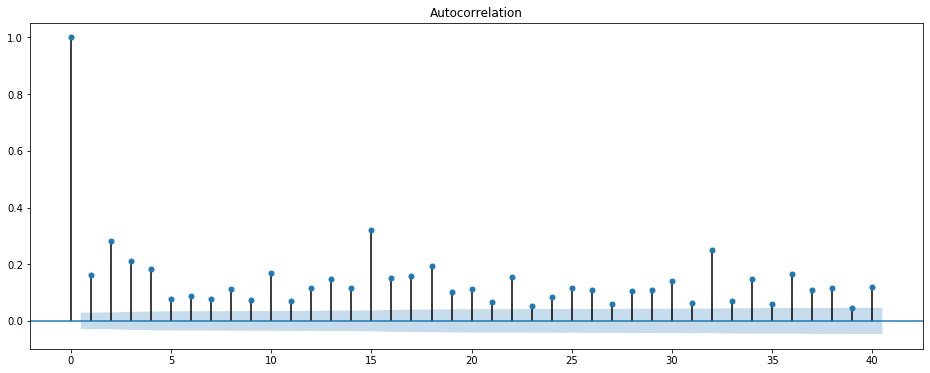

In [ ]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(resid.values ** 2, lags=40, ax=ax1)

In [ ]:
from statsmodels.stats.stattools import jarque_bera
_, jbpv, *_ = jarque_bera(returns.values)
print ('pvalue-->',jbpv)

pvalue--> [0.]


In [ ]:
from arch import arch_model
from arch.univariate import ZeroMean, GARCH, StudentsT, ConstantMean

In [ ]:
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
print (res.summary())
print (' ')
print ('The estimated parameters: ')
print ('----------------------------------------')
print (res.params)

Constant Mean - GARCH Model Results                         
Dep. Variable:              Log Return Rate   R-squared:                -5161710.184
Mean Model:                   Constant Mean   Adj. R-squared:           -5161710.184
Vol Model:                            GARCH   Log-Likelihood:               -38872.3
Distribution:      Standardized Student's t   AIC:                           77754.7
Method:                  Maximum Likelihood   BIC:                           77786.8
                                              No. Observations:                 4587
Date:                      Sun, Mar 08 2020   Df Residuals:                     4582
Time:                              21:50:17   Df Model:                            5
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            55.2241      0.539    102.

# $\begin{eqnarray} r_t & = & \mu + \epsilon_t + \theta\epsilon_{t-1} \\ \epsilon_t & = & \sigma_t e_t \\ \sigma^2_t & = & \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma^2_{t-1} \end{eqnarray}$

In [ ]:
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]
print(mu, theta, omega, alpha, beta)

0.0002615067034561962 -0.08874238195898754 0.0003888272659806071 0.5977012460803984 0.615133689641538


In [ ]:
sigma_t = res.conditional_volatility.iloc[-1]
sigma_forecast = np.sqrt(omega + alpha * res.resid.iloc[-1] ** 2 + beta * res.conditional_volatility.iloc[-1] ** 2)
epsilon_t = sigma_t * np.random.standard_normal()
epsilon_forecast = sigma_forecast * np.random.standard_normal()
returns_forecast = mu + epsilon_forecast + theta * epsilon_t
returns_forecast

36.79880283511403

In [ ]:
def returns_predict(period):
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool

In [ ]:
train_returns = pd.DataFrame(np.log(test_data['Open']).diff().dropna())
train_returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)

### Prediction results of the ARMA-GARCH model

<Figure size 1008x576 with 0 Axes>

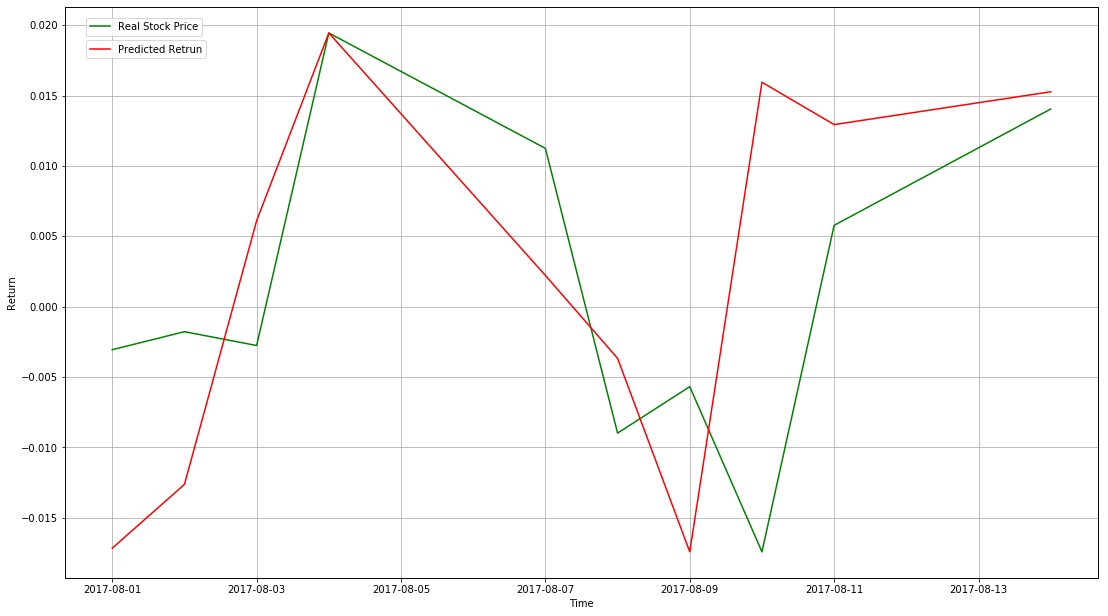

In [ ]:
plt.figure(figsize=(14,8))
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111)
ax.plot(data.index[-73:-63], train_returns['Log Return Rate'][:10], color='green', label = 'Real Stock Price')
ax2 = ax.twinx()
ax2.plot(data.index[-73:-63],returns_predict(10), color='red',label = 'Predicted Retrun')
ax.legend(loc = (0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")
ax2.set_yticks([])
ax2.legend(loc = (0.02, 0.91))

###  Prediction results of General Motors Company using the ARMA-GARCH model

C:\Users\JinYC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<Figure size 1008x576 with 0 Axes>

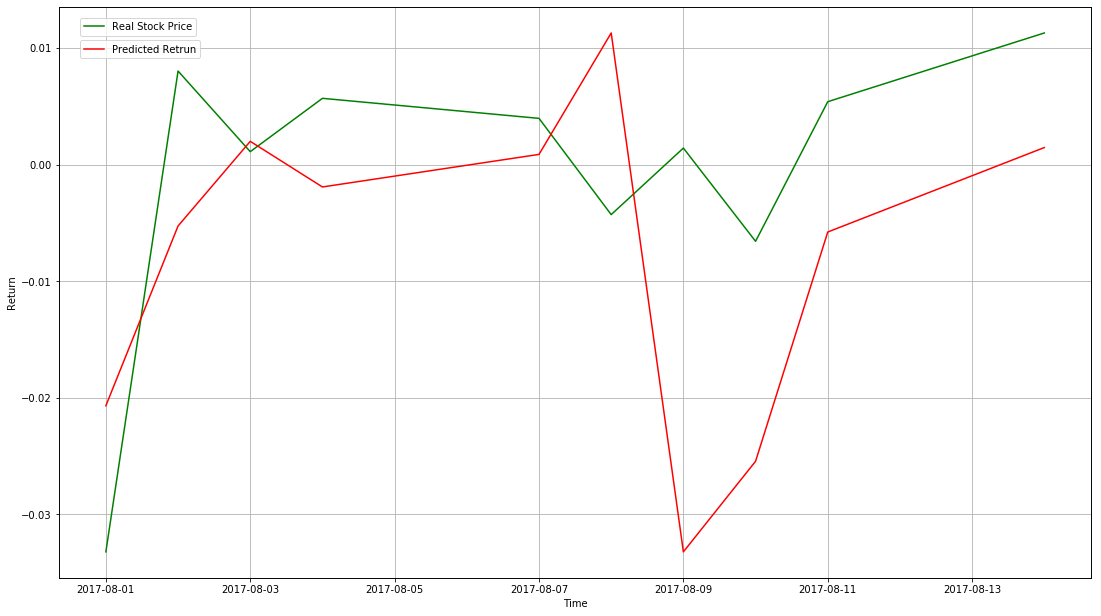

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data/gm.us.txt', sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
train_data, test_data = data[0:-73], data[-73:]
returns = pd.DataFrame(np.log(train_data['Open']).diff().dropna())
returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)
arma_mod01 = sm.tsa.ARMA(returns, (1, 0)).fit()
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]
def returns_predict(period):
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool
train_returns = pd.DataFrame(np.log(test_data['Open']).diff().dropna())
train_returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)
plt.figure(figsize=(14,8))
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111)
ax.plot(data.index[-73:-63], train_returns['Log Return Rate'][:10], color='green', label = 'Real Stock Price')
ax2 = ax.twinx()
ax2.plot(data.index[-73:-63],returns_predict(10), color='red',label = 'Predicted Retrun')
ax.legend(loc = (0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")
ax2.set_yticks([])
ax2.legend(loc = (0.02, 0.91))

### Prediction results of IBM using the ARMA-GARCH model

C:\Users\JinYC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<Figure size 1008x576 with 0 Axes>

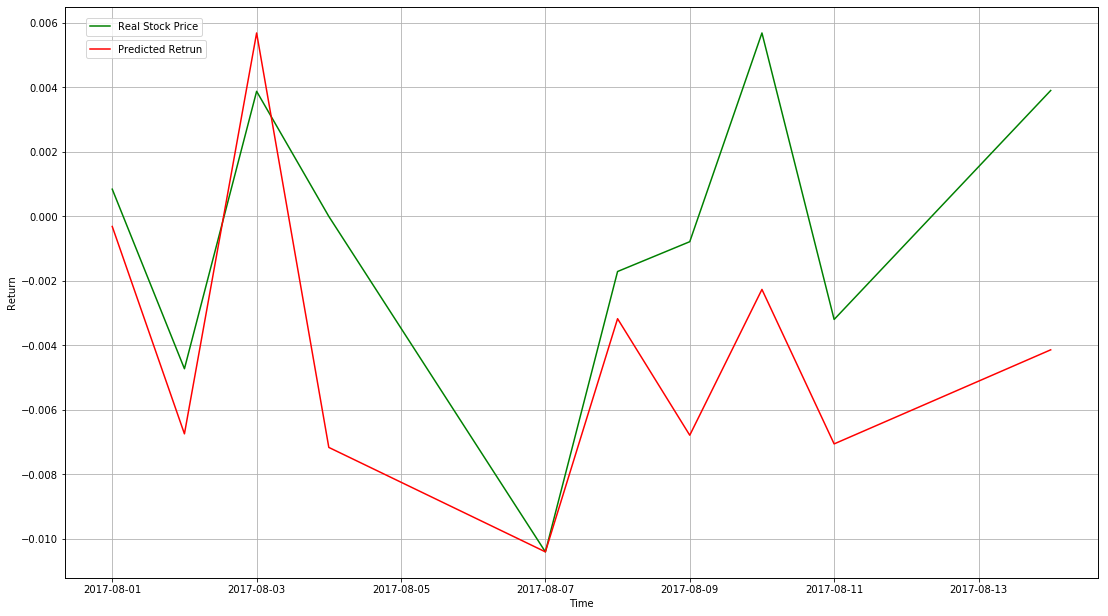

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data/ibm.us.txt', sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
train_data, test_data = data[0:-73], data[-73:]
returns = pd.DataFrame(np.log(train_data['Open']).diff().dropna())
returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)
arma_mod01 = sm.tsa.ARMA(returns, (1, 0)).fit()
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]
def returns_predict(period):
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool
train_returns = pd.DataFrame(np.log(test_data['Open']).diff().dropna())
train_returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)
plt.figure(figsize=(14,8))
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111)
ax.plot(data.index[-73:-63], train_returns['Log Return Rate'][:10], color='green', label = 'Real Stock Price')
ax2 = ax.twinx()
ax2.plot(data.index[-73:-63],returns_predict(10), color='red',label = 'Predicted Retrun')
ax.legend(loc = (0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")
ax2.set_yticks([])
ax2.legend(loc = (0.02, 0.91))

### Prediction results of Microsoft using the ARMA-GARCH model

C:\Users\JinYC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\JinYC\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


<Figure size 1008x576 with 0 Axes>

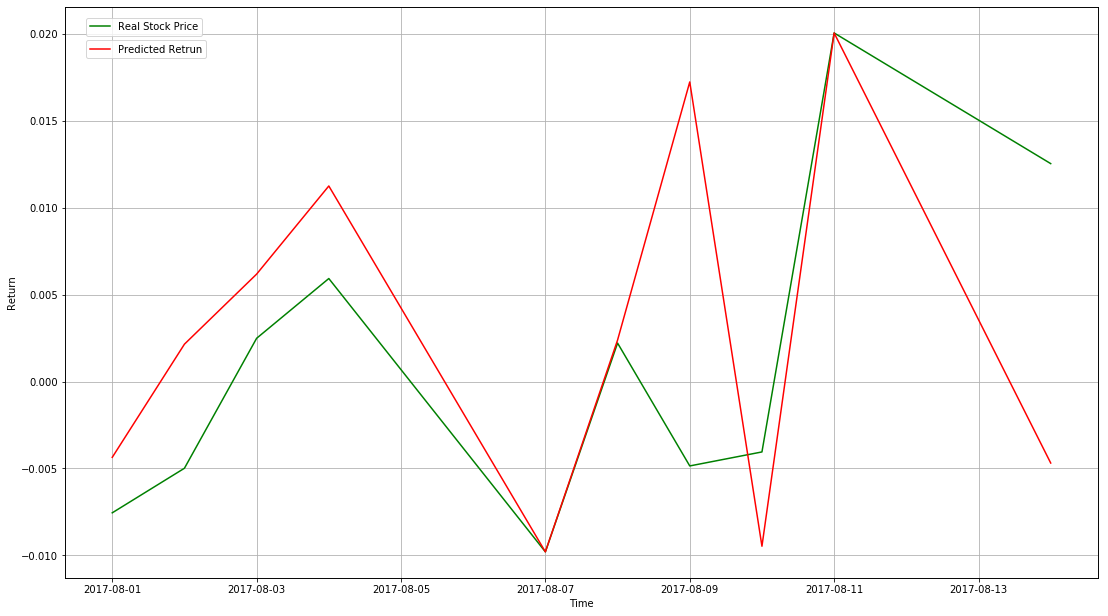

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data/msft.us.txt', sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
train_data, test_data = data[0:-73], data[-73:]
returns = pd.DataFrame(np.log(train_data['Open']).diff().dropna())
returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)
arma_mod01 = sm.tsa.ARMA(returns, (1, 0)).fit()
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]
def returns_predict(period):
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool
train_returns = pd.DataFrame(np.log(test_data['Open']).diff().dropna())
train_returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)
plt.figure(figsize=(14,8))
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111)
ax.plot(data.index[-73:-63], train_returns['Log Return Rate'][:10], color='green', label = 'Real Stock Price')
ax2 = ax.twinx()
ax2.plot(data.index[-73:-63],returns_predict(10), color='red',label = 'Predicted Retrun')
ax.legend(loc = (0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")
ax2.set_yticks([])
ax2.legend(loc = (0.02, 0.91))

### Prediction results of Tesla using the ARMA-GARCH model

C:\Users\JinYC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<Figure size 1008x576 with 0 Axes>

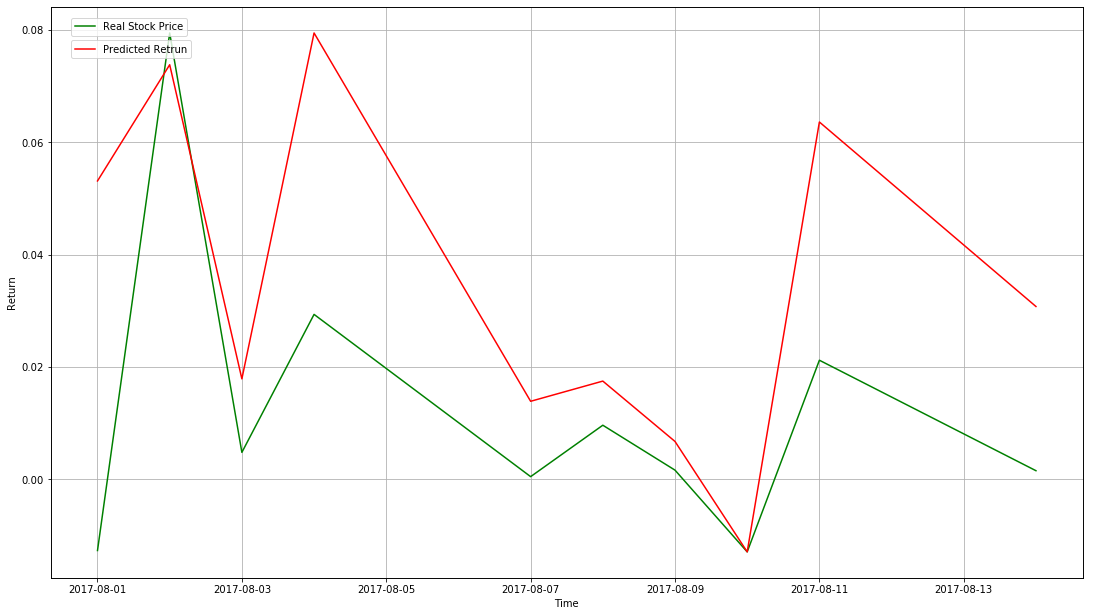

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data/tsla.us.txt', sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
train_data, test_data = data[0:-73], data[-73:]
returns = pd.DataFrame(np.log(train_data['Open']).diff().dropna())
returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)
arma_mod01 = sm.tsa.ARMA(returns, (1, 0)).fit()
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]
def returns_predict(period):
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool
train_returns = pd.DataFrame(np.log(test_data['Open']).diff().dropna())
train_returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)
plt.figure(figsize=(14,8))
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111)
ax.plot(data.index[-73:-63], train_returns['Log Return Rate'][:10], color='green', label = 'Real Stock Price')
ax2 = ax.twinx()
ax2.plot(data.index[-73:-63],returns_predict(10), color='red',label = 'Predicted Retrun')
ax.legend(loc = (0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")
ax2.set_yticks([])rmation and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
<matplotlib.legend.Legend at 0x27aa45ad4e0>
ax2.legend(loc = (0.02, 0.91))